# import

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
def predict_sex(name):
    name=str(name).split(' ')[0]
    sex_prediction = gender.Detector(case_sensitive=False)
    sex=sex_prediction.get_gender(name)
    sex_dic={'female':2,"male":1,'unknown':0,'mostly_female':-2 ,'mostly_male':-1,'andy':-3}
    return sex_dic[sex]

def creation_year(year):
    try:
        dt = datetime.strptime(str(year), '%Y-%m-%d %H:%M:%S')
        return dt.year
    except:
        return 0

def set_sex_code(x):
    x.loc[:,'sex_code']=predict_sex(x['name'])




# result

all the data

Accuracy: 89.88%

 Training Accuracy score: 0.9999632825408482
Testing Accuracy score: 0.8988103980026435
classification_report 
               precision    recall  f1-score   support

           0       0.89      0.81      0.84      2309
           1       0.90      0.95      0.93      4500

    accuracy                           0.90      6809
   macro avg       0.90      0.88      0.88      6809
weighted avg       0.90      0.90      0.90      6809



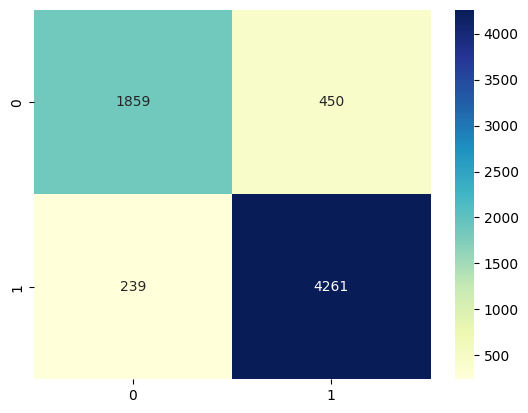

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+descvf.csv')
# tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
# x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

random undersampling  + Standardizing

Accuracy: 83.27%

 Training Accuracy score: 0.9999431818181819
Testing Accuracy score: 0.8327272727272728
classification_report 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      2200
           1       0.82      0.85      0.84      2200

    accuracy                           0.83      4400
   macro avg       0.83      0.83      0.83      4400
weighted avg       0.83      0.83      0.83      4400



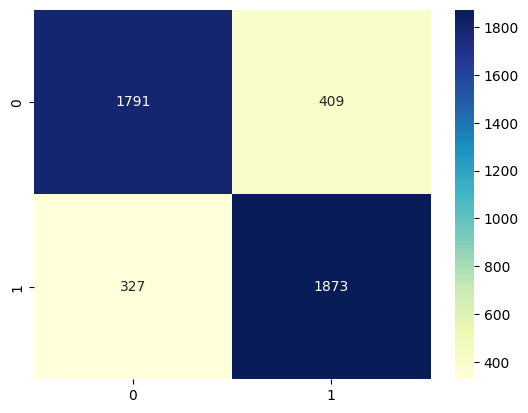

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('./Data/datavf.csv')

x=df.iloc[:, :-2]
y = df.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf', RandomForestClassifier()) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

random undersampling 

Accuracy: 87.18%

 Training Accuracy score: 1.0
Testing Accuracy score: 0.8718181818181818
classification_report 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      2200
           1       0.86      0.89      0.87      2200

    accuracy                           0.87      4400
   macro avg       0.87      0.87      0.87      4400
weighted avg       0.87      0.87      0.87      4400



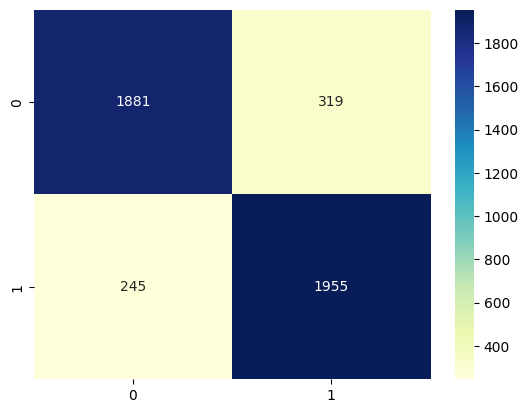

Index(['verified', 'statuses', 'location', 'date_joined', 'most_recent_post',
       'following', 'followers', 'favourites', 'lists', 'tweet_language',
       'tweets_this_week', 'retweet', 'retweeted_count', 'url',
       'userNameScore', 'avg_tweets_by_hour_of_day',
       'avg_tweets_by_day_of_week', 'screen_name', 'account_type'],
      dtype='object')

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('./Data/datavf.csv')

x=df.iloc[:, :-2]
y = df.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('rf', RandomForestClassifier()) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


TomekLinks undersimpling 

1    20727
0    11543
dtype: int64
Accuracy: 90.41%

 Training Accuracy score: 0.9999225286643941
Testing Accuracy score: 0.9040904865199876
classification_report 
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      2309
           1       0.91      0.95      0.93      4145

    accuracy                           0.90      6454
   macro avg       0.90      0.89      0.89      6454
weighted avg       0.90      0.90      0.90      6454



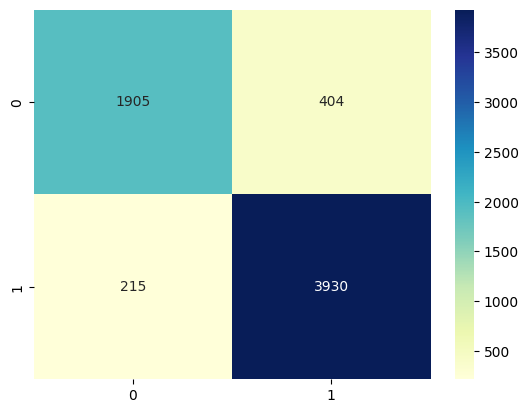

In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+descvf.csv')
tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

x, y = tl.fit_resample(x, y)
my_series = pd.Series(y)
value_counts = my_series.value_counts()
print(value_counts)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

Accuracy: 88.46%

 Training Accuracy score: 0.9998917045700672
Testing Accuracy score: 0.8845820701602425
classification_report 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      2309
           1       0.88      0.89      0.89      2309

    accuracy                           0.88      4618
   macro avg       0.88      0.88      0.88      4618
weighted avg       0.88      0.88      0.88      4618



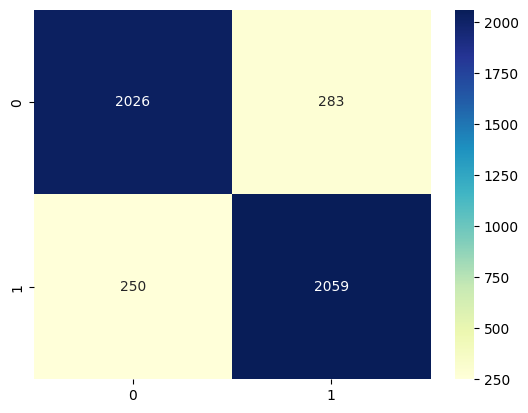

In [95]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+descvf.csv')
tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

x, y = tl.fit_resample(x, y)
# Convert the list to a DataFrame
y = pd.DataFrame({'account_type': y})

# Concatenate the two DataFrames
data = pd.concat([x, y], axis=1)
df1=data[data.account_type== 1].head(11543)
df2=data[data.account_type== 0].head(11543)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

oversampling

Accuracy: 90.80%

 Training Accuracy score: 0.9999166689814172
Testing Accuracy score: 0.9080102210865459
classification_report 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      4501
           1       0.90      0.92      0.91      4500

    accuracy                           0.91      9001
   macro avg       0.91      0.91      0.91      9001
weighted avg       0.91      0.91      0.91      9001



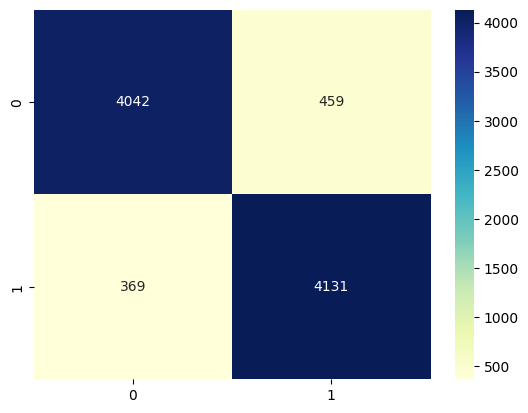

In [64]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
df = pd.read_csv('./Data/data+descvf.csv')

smote = SMOTE(random_state=10)
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x, y =smote.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)


clf=RandomForestClassifier()
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# with column relation

-oversimpling

Accuracy: 90.45%

 Training Accuracy score: 0.9999444459876115
Testing Accuracy score: 0.904455060548828
classification_report 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      4501
           1       0.90      0.91      0.91      4500

    accuracy                           0.90      9001
   macro avg       0.90      0.90      0.90      9001
weighted avg       0.90      0.90      0.90      9001



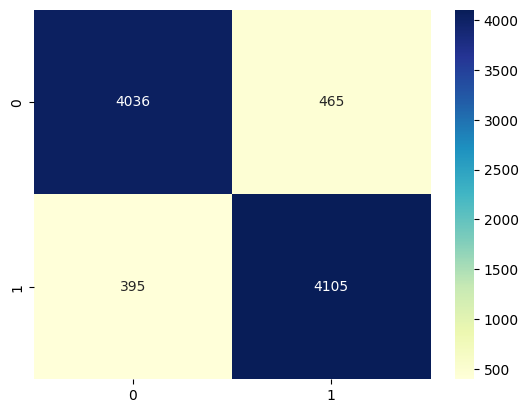

In [82]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
df = pd.read_csv('./Data/data+column_relation.csv')
df=df.drop(labels=['Unnamed: 0'],axis=1)

x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('rf', RandomForestClassifier()) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
# feat_importances = pd.Series(pipeline['rf'].feature_importances_, index=x.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

-random undersimpling

Accuracy: 93.64%

 Training Accuracy score: 0.9998295454545455
Testing Accuracy score: 0.9363636363636364
classification_report 
               precision    recall  f1-score   support

           0       0.97      0.91      0.93      2200
           1       0.91      0.97      0.94      2200

    accuracy                           0.94      4400
   macro avg       0.94      0.94      0.94      4400
weighted avg       0.94      0.94      0.94      4400



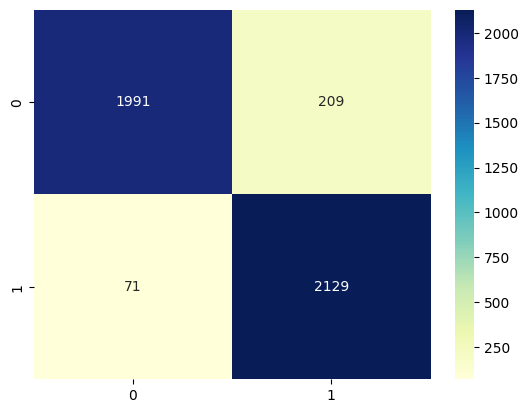

In [79]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')
data1=data1.drop(labels=['Unnamed: 0'],axis=1)
df1=data1[data1.account_type== 1].head(11000)
df2=data1[data1.account_type== 0].head(11000)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('rf', RandomForestClassifier()) # Training a random forest classifier on the data
])
# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

tomklink undersimpling

Accuracy: 89.90%

 Training Accuracy score: 0.9999223029408337
Testing Accuracy score: 0.899005593536358
classification_report 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      2309
           1       0.90      0.94      0.92      4127

    accuracy                           0.90      6436
   macro avg       0.90      0.88      0.89      6436
weighted avg       0.90      0.90      0.90      6436



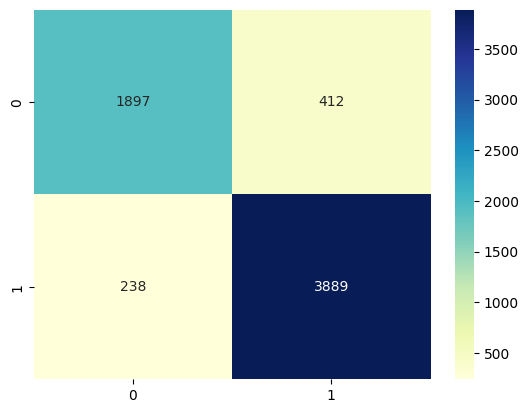

In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+column_relation.csv')
df=df.drop(labels=['Unnamed: 0'],axis=1)
tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

# with features selection

In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')
data1=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'account_type']]

# followers/lastpost - followers :negative 
# engagment rate - followers :positive 
# following - following/years:negative
# followers/lastpost - engagment rate : negative 
# tweet by houre -tweet by day : positive 


# 'verified', 'statuses', 'location', 'date_joined',
#        'most_recent_post', 'following', 'followers', 'favourites', 'lists',
#        'tweet_language', 'tweets_this_week', 'retweet', 'retweeted_count',
#        'url', 'userNameScore', 'avg_tweets_by_hour_of_day',
#        'avg_tweets_by_day_of_week', 'following/years', 'followers/lastpost',
#        'engagment_rate', 'description', 'screen_name', 'account_type'

# df=df.loc[:,['verified', 'statuses', 'location', 'date_joined',
#        'most_recent_post', 'following', 'followers', 'favourites', 'lists',
#        'tweet_language', 'tweets_this_week', 'retweet', 'retweeted_count',
#        'url', 'userNameScore', 'avg_tweets_by_hour_of_day',
#        'avg_tweets_by_day_of_week','description','screen_name','account_type']]



# the best

- random undersimpling 

Accuracy: 93.50%

 Training Accuracy score: 0.9998863636363636
Testing Accuracy score: 0.935
classification_report 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      2200
           1       0.91      0.96      0.94      2200

    accuracy                           0.94      4400
   macro avg       0.94      0.94      0.93      4400
weighted avg       0.94      0.94      0.93      4400



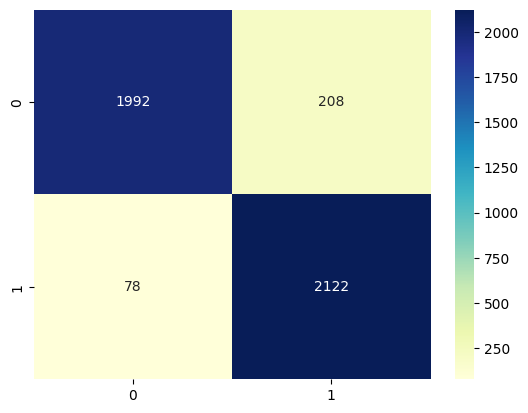

In [97]:
df1=data1[data1.account_type== 1].head(11000)
df2=data1[data1.account_type== 0].head(11000)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('rf', RandomForestClassifier()) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

- oversimpling

Accuracy: 90.55%

 Training Accuracy score: 0.9999444459876115
Testing Accuracy score: 0.9054549494500611
classification_report 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      4501
           1       0.90      0.91      0.91      4500

    accuracy                           0.91      9001
   macro avg       0.91      0.91      0.91      9001
weighted avg       0.91      0.91      0.91      9001



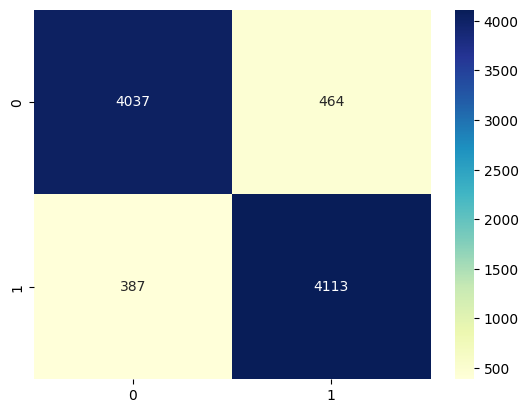

In [99]:
from imblearn.over_sampling import SMOTE
df=data1
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('rf', RandomForestClassifier()) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

tomklink undersimpling

Accuracy: 89.59%

 Training Accuracy score: 0.9998829405337911
Testing Accuracy score: 0.8959113607990012
classification_report 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      2309
           1       0.90      0.94      0.92      4099

    accuracy                           0.90      6408
   macro avg       0.89      0.88      0.88      6408
weighted avg       0.90      0.90      0.89      6408



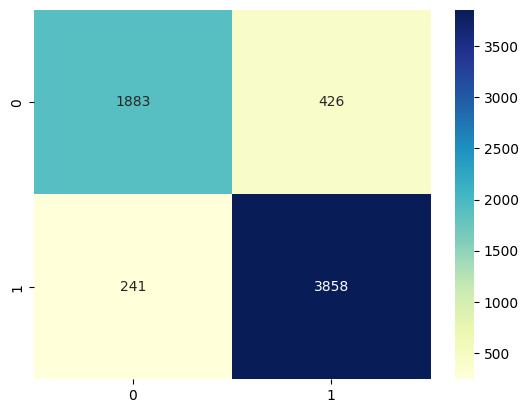

In [100]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df=data1
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

#  cross validation

oversimpling

In [105]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')
data1=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'account_type']]
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import SMOTE

df=data1
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
k_folds = KFold(n_splits = 10)
clf=RandomForestClassifier()
scores = cross_val_score(clf, x, y, cv = k_folds)

print("Average CV Score: ", scores.mean())
# Average CV Score:  0.8398758843713743 /90

Average CV Score:  0.8398758843713743


random undersimpling

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')
data1=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'account_type']]
from sklearn.model_selection import KFold, cross_val_score
df1=data1[data1.account_type== 1].head(11000)
df2=data1[data1.account_type== 0].head(11000)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

k_folds = KFold(n_splits = 10)
clf=RandomForestClassifier()
scores = cross_val_score(clf, x, y, cv = k_folds)

print("Average CV Score: ", scores.mean())
# Average CV Score:  0.7206363636363636 /93



Average CV Score:  0.7206363636363636


the Final Data 

In [2]:
import pandas as pd 
data1 = pd.read_csv('./Data/data+column_relation.csv')
data1=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate','screen_name', 'account_type']]
df = pd.DataFrame(data1)

# save the DataFrame to a CSV file
df.to_csv('./Data/dataFinal.csv', index=False)